# Mutation biases

So far, we have mostly used our evolutionary model as a proxy to study the structure a sequence-function relationship or a fitness landscape, but were not focused on how evolution would actually take place on that landscape in a specific case, where parameters like the population size and mutational biases are also relevant.

In this section, we will see how to incorporate different mutational biases to generate modified visualizations where some mutations are already expected to happen by chance more than others regardless of natural selection using the simple Serine codon landscape as in previous sections




In [1]:
# Import required libraries
import numpy as np

import gpmap.src.plot as plot

from gpmap.src.space import SequenceSpace, CodonSpace
from gpmap.src.randwalk import WMWSWalk

Lets start by defining our discrete space with the `CodonSpace` object and the random walk under the weak mutation weak selection regime using `WMWSWalk` on it and calculate the visualization coordinates under a uniform mutation model to keep for comparison

In [11]:
space = CodonSpace(['S'], add_variation=True, seed=0)
rw = WMWSWalk(space)
rw.calc_visualization(Ns=1)
nodes_df_unif, edges_df_unif = rw.nodes_df, rw.space.get_edges_df()
print(space)

Sequence Space:
	Type: dna
	Sequence length: 3
	Number of alleles per site: [4, 4, 4]
	Genotypes: [AAA,AAC,AAG,...,TTC,TTG,TTT]
	Function y: [1.18,1.04,1.10,...,0.96,0.92,0.83]


Now we need to define the mutational model. For the overall markov chain to be time-reversible, the neutral dynamics also need to be time-reversible

$$\mu_{ij} \pi_i = \mu_{ji} \pi_j$$


While the use could direcly define a time-reversible mutation rate matrix for the whole set of states to incorporate complex mutational biases e.g. where mutation rates depend on neighboring sites, we provide an interface to generate site-independent mutational models very easily, parametrized in terms of the stationary frequencies $
\pi$ and the symmetric exchangeability rates as in [classic nucleotide substitution models](https://en.wikipedia.org/wiki/Substitution_model). We can also make some sites mutate faster than others.

However, we provide an even simplified version that allows us to specify the specific substitution models for our neutral dynamics that generalize to all sites simultaneously

In [8]:
exchange_rates = {'a':1, 'b': 2}
stat_freqs = {'A': 0.2, 'C': 0.3, 'G': 0.3, 'T': 0.2}
neutral_Q = rw.calc_model_neutral_rate_matrix('HKY85', exchange_rates=exchange_rates, stat_freqs=stat_freqs)

/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


We can now specify the strength of selection and calculate the coordinates of the visualization as in previous cases

In [4]:
rw.calc_visualization(Ns=1)

In [5]:
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df.head()

,1,2,3,4,5,6,7,8,9,function,stationary_freq
AAA,4.282183,7.832759,1.340793,-0.582967,1.790193,-2.947571,6.978578,10.904558,0.275654,1.176405,0.007924
AAC,8.004798,-1.172044,0.110783,-0.633765,-3.497568,-4.219734,0.873347,6.983010,0.865326,1.040016,0.011933
AAG,4.062730,6.986796,1.264956,-1.444484,1.724820,-4.716403,-3.308956,10.279112,0.010051,1.097874,0.011933
AAT,9.155838,-1.632527,0.242802,-1.843276,6.792549,1.486887,-0.172970,8.269325,0.209206,1.224089,0.007924
ACA,-1.705584,4.395789,7.674481,-1.789080,-1.191488,2.075019,7.108103,4.427547,-4.519978,1.186756,0.011933


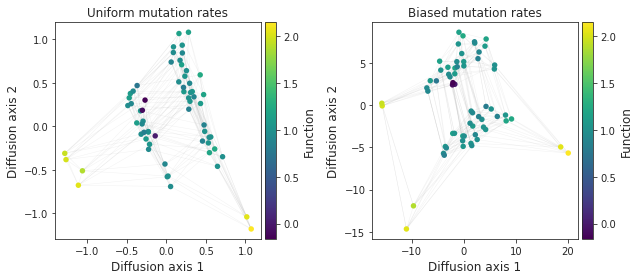

In [15]:
fig, subplots = plot.init_fig(1, 2, rowsize=4, colsize=4.5)
plot.plot_visualization(subplots[0], nodes_df_unif, edges_df=edges_df_unif, nodes_size=30)
subplots[0].set_title('Uniform mutation rates')
plot.plot_visualization(subplots[1], nodes_df, edges_df=edges_df, nodes_size=30)
subplots[1].set_title('Biased mutation rates')
fig.tight_layout()

We can clearly see that the landscape is deformed with respect to the model with uniform mutation rates. Indeed, we see how the set of 4 connected codons has be separated into to subclusters since now transversions are much less frequent, so the expected time to fix a transversion is longer, even between functional sequences

Lets now see how the visualizations change as we interpolate between a completely uniform model towards a transition/transversion biased mutational model